# **Project Name**    **- Seoul Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Vaibhav Kumar Gupta
##### **Team Member 2 -**Bhavik Verma
##### **Team Member 3 -**Priyanka Pal
##### **Team Member 4 -**Dil Khush Sharma
##### **Team Member 5 -**Shayan Somanna

# **Project Summary -**

Currently many urban cities have introduced rental bikes to improve mobility comfort (e.g. Rapido and Uber Moto in India). It is critical to make the rental bike available and accessible to the public at the appropriate time, as this reduces waiting time. Eventually, providing a steady supply of rental bikes to the city becomes a major concern. The critical part is predicting the number of bikes needed at each hour to ensure a steady supply of rental bikes.

We performed exploratory data analysis on the provided dataset and discovered numerous findings that will be beneficial to rental bike companies. There are several factors driving the demand for rental bikes. We've selected the most useful features.

We tested several machine learning models to correctly predict bike demand, which will save the company's resources and generate more and more profits.

The goal is to design different Machine Learning models and come up with the model which gives the best prediction of the rented bike count required to be supplied at each hour. Before designing any ML model, we require to clean the data and draw significant insights from the data. To begin with, we view the dataset including its description, various columns, number of null values, different categorical variables, unique value count, the shape of the dataset and different statistical parameters. We begin by removing the null values if any. Then we plot the distributions of each variable to see how the data is distributed. We get an idea about the skewness of the data. Ideally, we want our data to have a normal distribution. If there is skewness in the data we go for feature transformation. Visualizing different kinds of transformation on the skewed variables helps you to determine the best transformation for your features. We can check the numerical value of skewness of the variables using the .skew() method. We also plot a box plot of the features to check the outliers in the data. Outliers play a significant role in data analysis as they affect the statistical parameters. Then we plot the correlation heatmap to check for collinear features. Since collinearity is not desired in the data, we linearly combine the collinear features or drop them. In our project, Year and Dew point temperatures have the highest multi-correlation hence they’re dropped. Moving ahead, we analyze the categorical variables and perform one hot encoding for conversion. The original categorical columns are dropped and we get our final clean dataset. A feature importance graph is plotted to show which features contribute the most to our model. Then we perform the splitting of the data into train-test sets and perform feature scaling. Then we apply LR, Decision Tree, Random forest regression, XG Boost regression, Gradient Boosting and AdaBoost models to get the best model for our business problem. We calculate the evaluation metrics R2 score, adjusted R2 and RMSE for each model. Then a model comparison chart is plotted to compare the metrics.XGBoost with Hypertunning gives the best results of all the models for the given business problem with R2 score=0.927 and adjusted R2 of 0.9267. Also, it has the lowest RMSE of all the models which equals 9.5 on training data and 174.12 on test data.

# **GitHub Link -**

https://github.com/pp0tm8k/COMMIT-3

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.1 MB/s eta 0:00:00


In [8]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
sns.set()

from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from time import time
from sklearn.metrics import r2_score
import xgboost as xgb

from sklearn.model_selection import cross_val_score

### Dataset Loading

In [9]:
# Load Dataset PRIYANKA
path='/content/drive/MyDrive/seoul bike sharing demand prediction/SeoulBikeData.csv'
df=pd.read_csv (path, encoding = 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(4)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'We have {len(df[df.duplicated()])} duplicate values.')

We have 0 duplicate values.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'We have {df.isna().sum().sum()} null values.')

We have 0 null values.


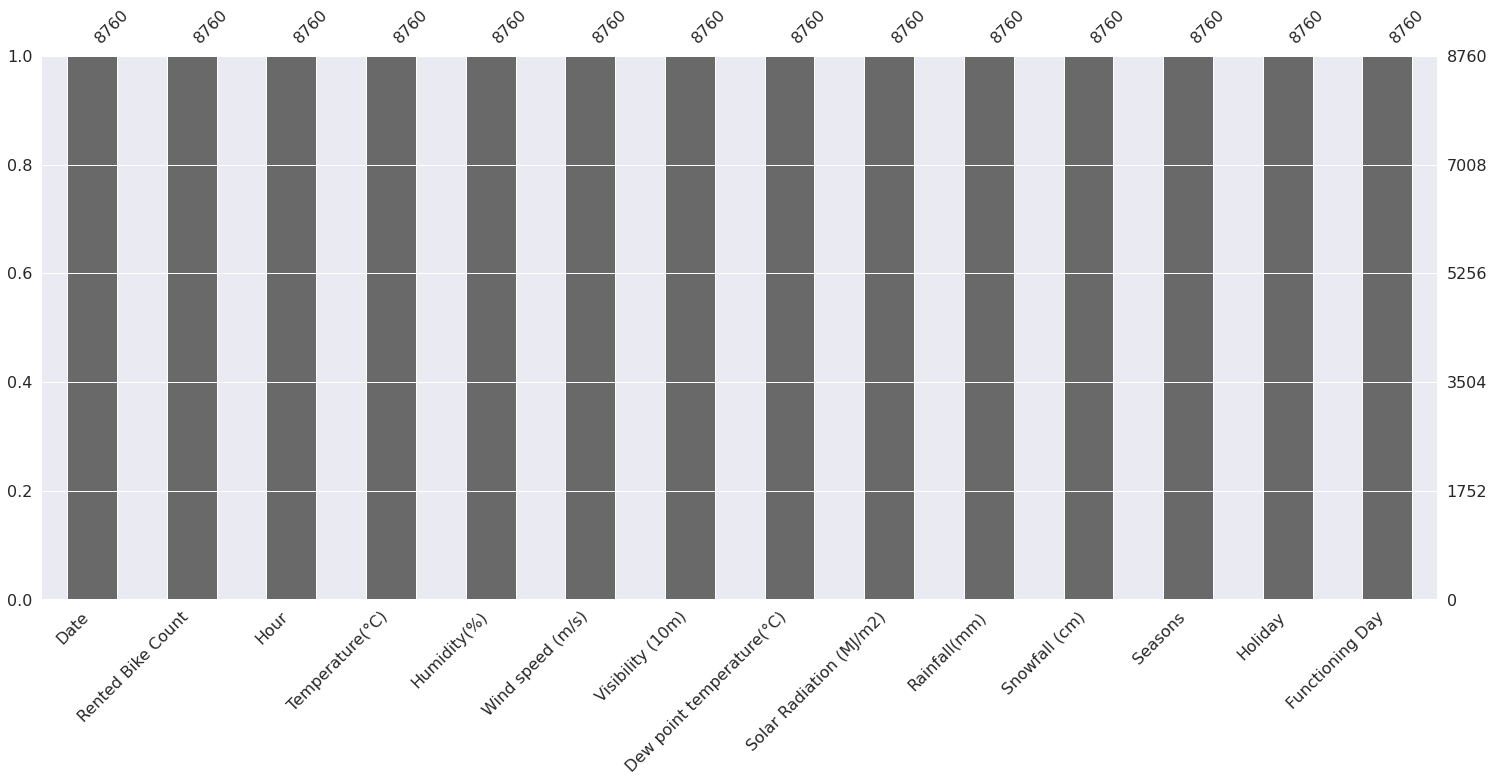

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

*  Our Dataset contains 8760 instances and 14 columns.
*  This dataset has no null values as well as no duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# return the column labels
result = df.columns

# Print the result
print(result)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**We can notice Solar Radiation , Rainfall and Snowfall are highly positively skewed.**

### Variables Description 

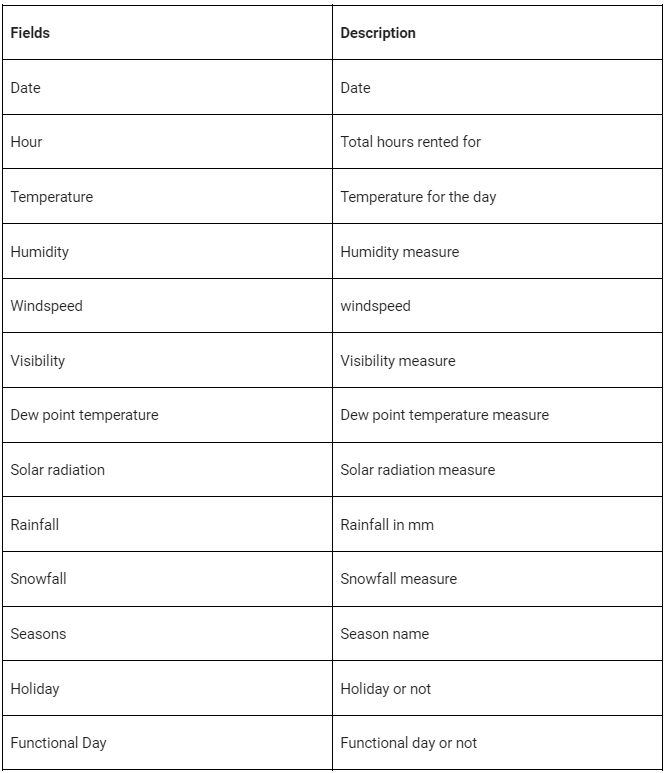

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Method-1
df2=pd.unique(df[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']].values.ravel('K'))
print(df2)

['01/12/2017' '02/12/2017' '03/12/2017' ... 'Holiday' 'Yes' 'No']


In [ ]:
# Method-2
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking the type of date as from the data.info() we got to know that its an object type 
type(df['Date'][0])

str

In [ ]:
# Converting date variable to datetime datatype
from datetime import datetime as dt
df['Date'] = df['Date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Checking the type  again for confirming 
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Renaming the columns
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
# Columns to visualize its distributions and possible correlation
columns_to_view=df.columns[3:-3]

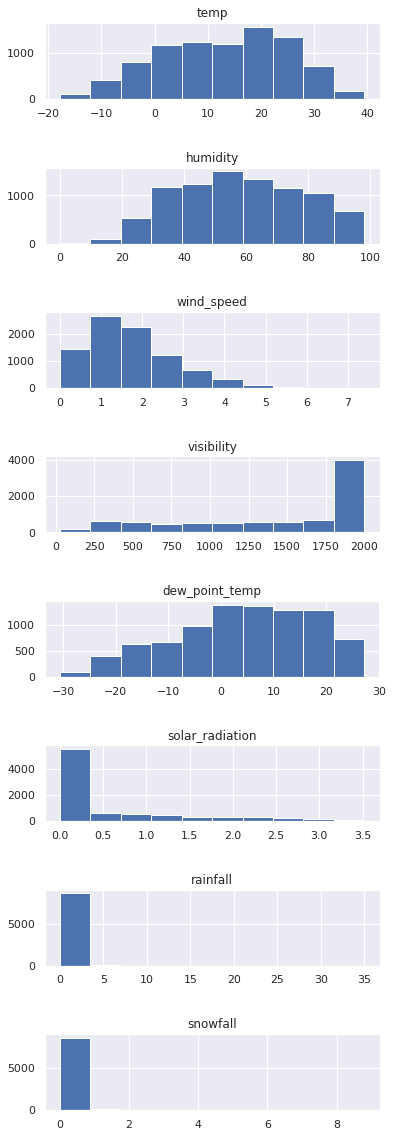

In [ ]:
from matplotlib.figure import Figure
fig,axis=plt.subplots(len(columns_to_view),figsize=(6,20))
fig.subplots_adjust(hspace=0.9,wspace=0.3)
for i in range(len(columns_to_view)):
  
  axis[i].set_title(str(columns_to_view[i]))
  axis[i].hist(df[columns_to_view[i]])


In [ ]:
# Calculating the time span of dataset
print(" The number of days for which the dataset is collected is ",df['date'].max()-df['date'].min())

 The number of days for which the dataset is collected is  364 days 00:00:00


### **Observations about dataset**

*   **This dataset is collected from December 2017 to November 2018 , exactly 364 days. that makes it 1 year of time span**  
*   **This dataset contains 8760 instances and 14 attributes**


**Splitting the date column into date , month and year**

In [ ]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day_name()

In [ ]:
df['day'].value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: day, dtype: int64

In [ ]:
df['weekdays_weekend']=df['day'].apply(lambda elem :1 if elem=='Saturday' or elem=='Sunday' else 0)
df.head(4)

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,day,weekdays_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


In [ ]:
df=df.drop(['date','year','day'],axis=1)



*   **First we split the `date` column into `day ,month and year`**
*   **We have data from December 2017 to November 2018, so this is basicaly 1 year of span, so we can ignore this `year` column**

*   **Then we split our days into `weekdays amd weekends` as this make more sense than using all the 7 days as labels, weekdays and wekends can be more helpful. As litreature survey says that generaly we can have more bike sharing in weekdays than weekends**



In [ ]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

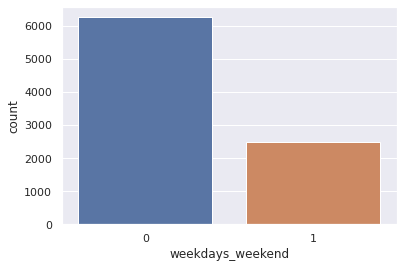

In [ ]:
sns.countplot(x=df['weekdays_weekend'])

In [ ]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

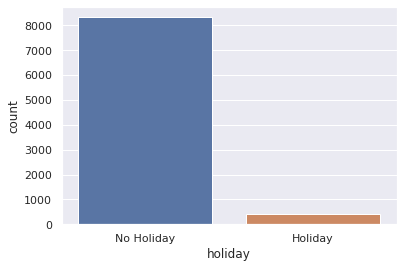

In [ ]:
sns.countplot(x=df['holiday'])

In [ ]:
dependent_var='rented_bike_count'
independent_var=list(set(df.columns)-{dependent_var})
print(independent_var)

['visibility', 'snowfall', 'func_day', 'wind_speed', 'dew_point_temp', 'seasons', 'weekdays_weekend', 'month', 'rainfall', 'temp', 'holiday', 'humidity', 'hour', 'solar_radiation']


###Our literature survey suggests that dew point temperature **`dew_point_temp`**  and temperature **`temp`** can be highly correlated

*   Lets check the relation between **`dew_point_temp`** and **`temp`**

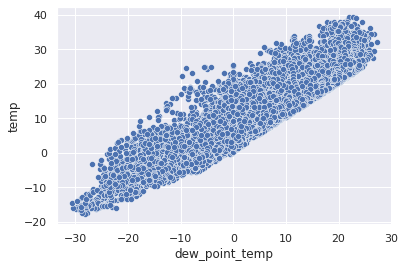

In [ ]:
# Plotting scatterplot between dew point temprature and temprature
sns.scatterplot(x=df['dew_point_temp'],y=df['temp'])

In [ ]:
# Checking the correlation between dew_point_temp and	temp
df[['dew_point_temp','temp']].corr()

,dew_point_temp,temp
dew_point_temp,1.000000,0.912798
temp,0.912798,1.000000


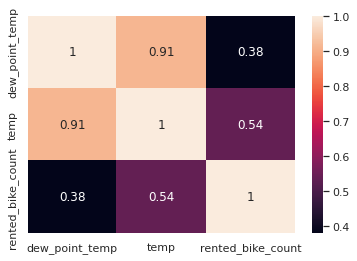

In [ ]:
sns.heatmap(df[['dew_point_temp','temp','rented_bike_count']].corr(),annot=True)

*   We can notice that **`dew_point_temp`** is less positively correlated to **`rented_bike_count`** than **`temp`**, but both have impact on **`rented_bike_count`**` having positive correlation .

*   So we can try to combine both of them and will give more weightage to **`temp`** than **`dew_point_temp`**.



In [ ]:
# Calculating weighted temperature from temp and dew point temp
df['weighted_temp']=0.7*df['temp']+0.3*df['dew_point_temp']

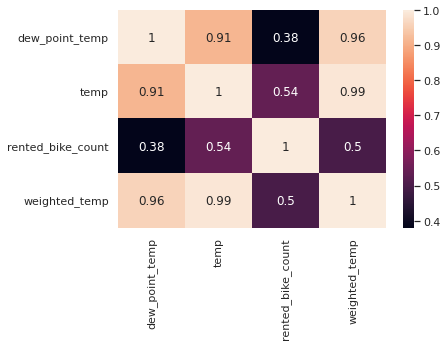

In [ ]:
sns.heatmap(df[['dew_point_temp','temp','rented_bike_count','weighted_temp']].corr(),annot=True)

### What all manipulations have you done and insights you found?

* we have used mostly groupby method on variables and tried to find depedent variable mean , count etc in order to find the relation between the variables



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
df.groupby(['weekdays_weekend'])['rented_bike_count'].mean()

weekdays_weekend
0    719.448914
1    667.342147
Name: rented_bike_count, dtype: float64

[Text(0.5, 1.0, 'Average demand of rented bikes in weekdays and weekends')]

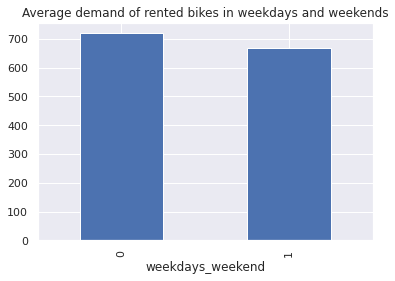

In [ ]:
# Chart - 1 Visualization code
df.groupby(['weekdays_weekend'])['rented_bike_count'].mean().plot.bar().set(title='Average demand of rented bikes in weekdays and weekends')

##### 1. Why did you pick the specific chart?

**Ans)** To plot the average demand of rented bikes.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** Demand of rented bike is high during weekdays than weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans)** Yes this insight will help business to create a postive impact.

#### Chart - 2

In [ ]:
df.groupby(['holiday'])['rented_bike_count'].mean()

holiday
Holiday       499.756944
No Holiday    715.228026
Name: rented_bike_count, dtype: float64

[Text(0.5, 1.0, 'Average demand of rented bikes during holidays and normal days.')]

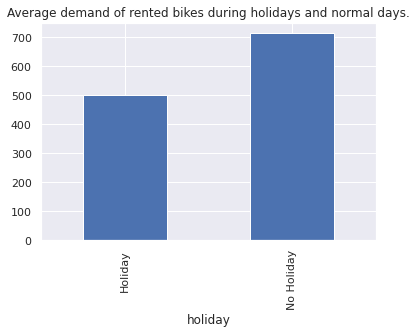

In [ ]:
# Chart - 2 Visualization code
df.groupby(['holiday'])['rented_bike_count'].mean().plot.bar().set(title='Average demand of rented bikes during holidays and normal days.')

##### 1. Why did you pick the specific chart?

**Ans)** To plot the average demand of rented bikes.


##### 2. What is/are the insight(s) found from the chart?

**Ans)** The demand of rented bikes in more in normal days(no holiday).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans)** Yes this insight will help business to create a positive impact.

#### Chart - 3

[Text(0.5, 1.0, 'Skewness of dependent variable')]

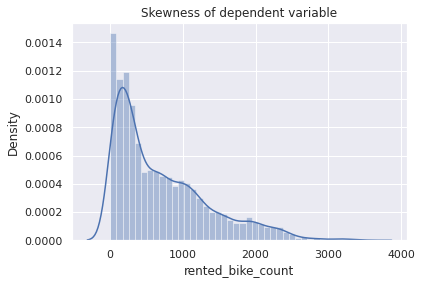

In [ ]:
# Chart - 3 Visualization code
sns.distplot(df[dependent_var]).set(title='Skewness of dependent variable')

In [ ]:
# Lets check its skewness
print(f'The skewness of the dependent variable is {df[dependent_var].skew()} ')

The skewness of the dependent variable is 1.1534281773679014 


**Looks like positively skewed , we can apply log transformation, square root tranformation etc. to bring normality.**

##### 1. Why did you pick the specific chart?

**Ans)** To check the skewness of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** Dependent variable is positively skewed.

#### Chart - 4

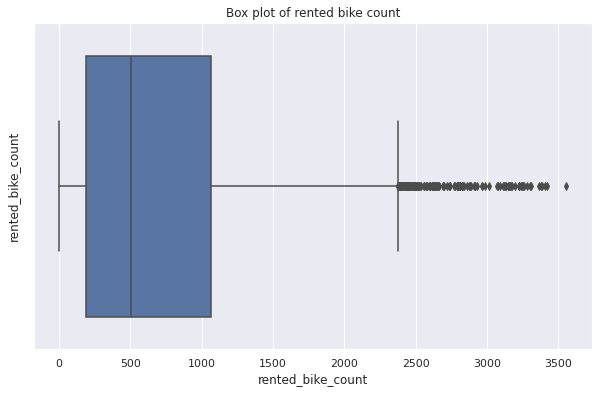

In [ ]:
# Chart - 4 Visualization code

#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('rented_bike_count')
sns.boxplot(x=df['rented_bike_count'])
plt.title('Box plot of rented bike count')
plt.show()

##### 1. Why did you pick the specific chart?

**Ans)** To check the outliers in the rented_bike_count column using boxplot.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** We have some outliers too in original dependent variable.

#### Chart - 5

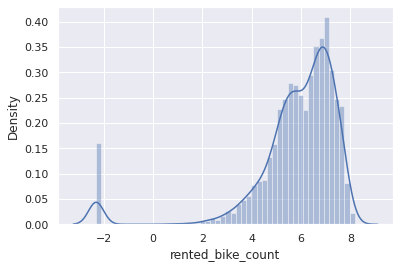

In [ ]:
# Chart - 5 Visualization code
# Applying log transformation
sns.distplot(np.log(df[dependent_var]+0.1))

In [ ]:
# Lets check its skewness
print(f'The skewness of the log transformation is {np.log(df[dependent_var]+0.1).skew()} ')

The skewness of the log transformation is -2.6453665610058574 


##### 1. Why did you pick the specific chart?

**Ans)** To check the skewness of the rented bike count after applying log transformation.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** Now the dependent variable is negatively skewed after applying transformation.

#### Chart - 6

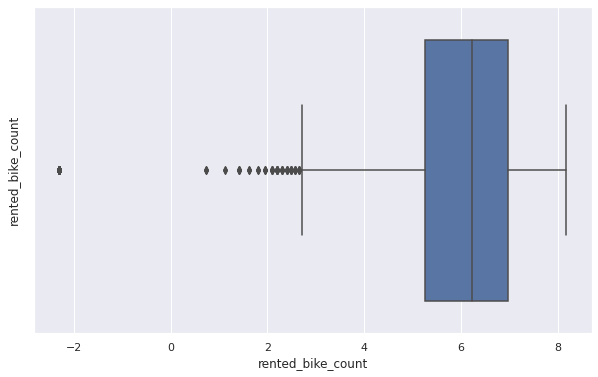

In [ ]:
# Chart - 6 Visualization code
#Boxplot of Rented Bike Count to check outliers after applying log transformation
plt.figure(figsize=(10,6))
plt.ylabel('rented_bike_count')
sns.boxplot(x=np.log(df['rented_bike_count']+0.1))
plt.show()

##### 1. Why did you pick the specific chart?

**Ans)** To check the outliers in the dependent variable after applying log transformation.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** After applying the log tranformation we can notice that the skewness has been increased for the dependent variable also we have some outliers though

#### Chart - 7

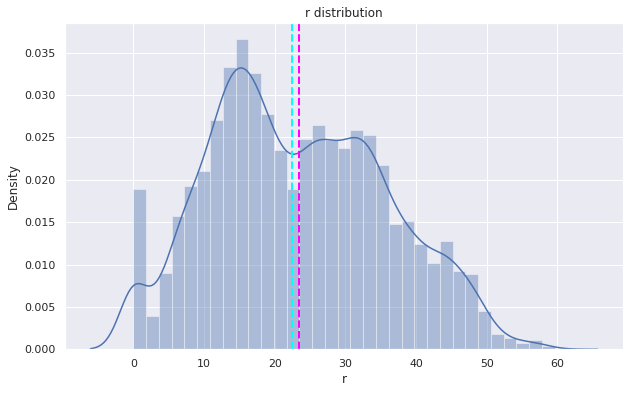

In [ ]:
# Chart - 7 Visualization code
# Visualizing the distribution of dependent variable after applying square root transformation
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df[dependent_var]))
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')
plt.axvline(np.sqrt(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# Lets check its skewness
print(f'The skewness of the square root transformation is {np.sqrt(df[dependent_var]).skew()} ')

The skewness of the square root transformation is 0.237362090985412 


##### 1. Why did you pick the specific chart?

**Ans)** To check the skewness of the dependent varible after applying square root transformation.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** After applying square root transformation the distributiin now seems normal.

#### Chart - 8

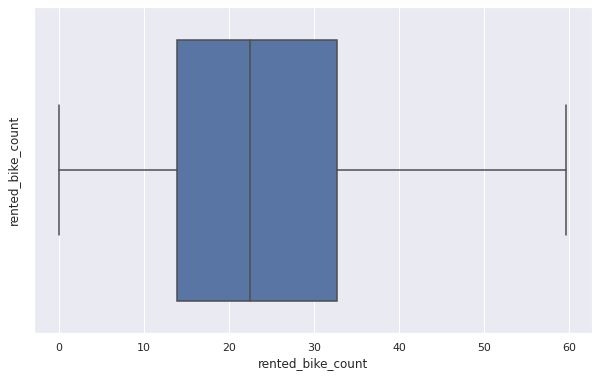

In [ ]:
# Chart - 8 Visualization code
# Boxplot of Rented Bike Count to check outliers after applying square root transformation
plt.figure(figsize=(10,6))
plt.ylabel('rented_bike_count')
sns.boxplot(x=np.sqrt(df['rented_bike_count']))
plt.show()



*   **It seems to follow normality** 

*   **We dont have any outliers**
*   **Also the skewness is very less than our original dependent variable distribution**
*    **So square root transfromation can be a very good option here**



##### 1. Why did you pick the specific chart?

**Ans)** To check outliers after applying log transformation.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** After applying square root transformation there are no outliers left.

#### Chart - 9

<Figure size 576x360 with 0 Axes>

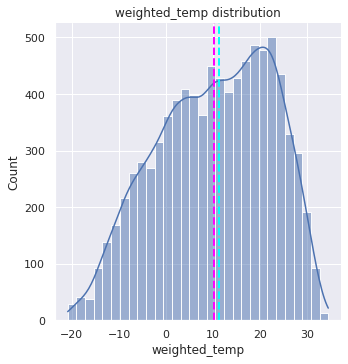

<Figure size 576x360 with 0 Axes>

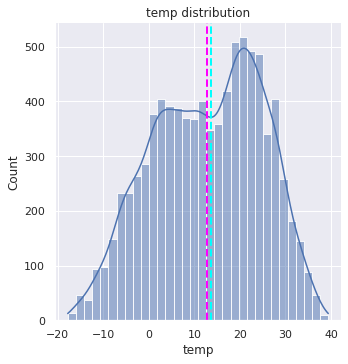

<Figure size 576x360 with 0 Axes>

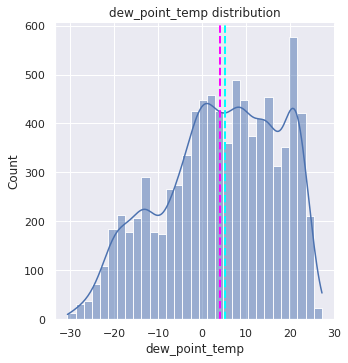

<Figure size 576x360 with 0 Axes>

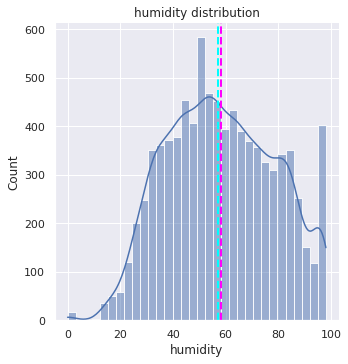

<Figure size 576x360 with 0 Axes>

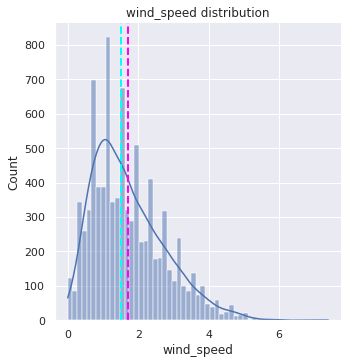

<Figure size 576x360 with 0 Axes>

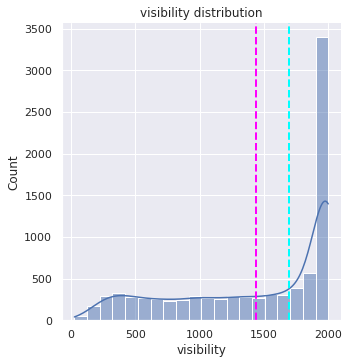

<Figure size 576x360 with 0 Axes>

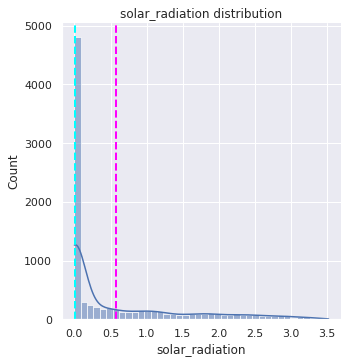

<Figure size 576x360 with 0 Axes>

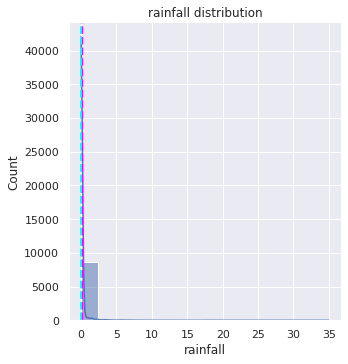

<Figure size 576x360 with 0 Axes>

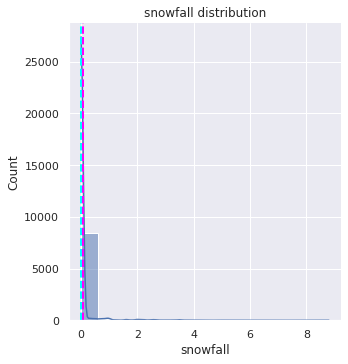

In [ ]:
# Chart - 9 Visualization code
# Continuous independent variables can be categorized as
continuous_var = ['weighted_temp','temp','dew_point_temp', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']


# Plotting the  distributions of the continious variable for the analysis
for elem in continuous_var:
  plt.figure(figsize=(8,5))
  sns.displot(df[elem],kde=True)
  plt.axvline(df[elem].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[elem].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(elem+' distribution')

##### 1. Why did you pick the specific chart?

**Ans)** To check distribution of continuous independent variables.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** 
* Weighted temeprature (weighted_temp) and humidity are normaly distributed.
* wind_speed, snowfall, rainfall, solar_radiation are positively skewed.
* visibility is negetively skewed





#### Chart - 10

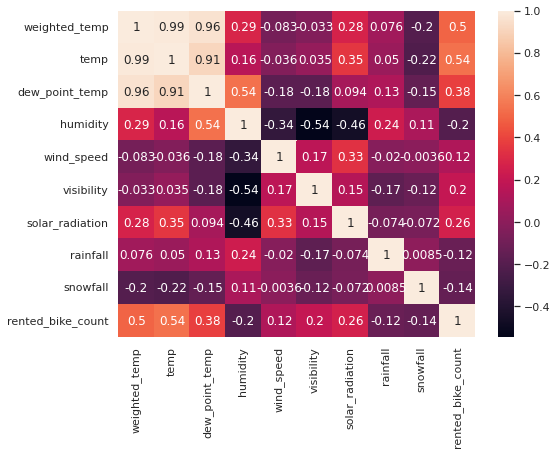

In [ ]:
# Chart - 10 visualization code
# Heatmap for the continous variables in order to understand the relationship with the dependent variable
plt.figure(figsize=(8,6))
sns.heatmap(df[continuous_var+['rented_bike_count']].corr(),annot=True)

##### 1. Why did you pick the specific chart?

**Ans)** To understand the relationship between independent variables and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** 
* snowfall, rainfall and humidity are negatively correlated with the dependent variable rented_bike_count.
* weighted_temp, wind_speed, visibility and solar_radiation are positively correlated with dependent variable rented_bike_count.




#### Chart - 11

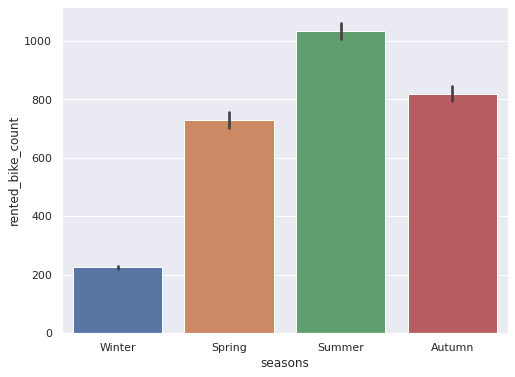

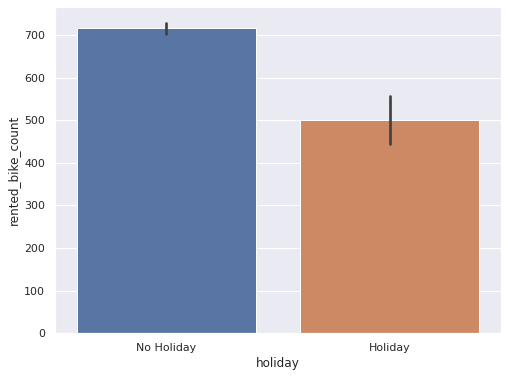

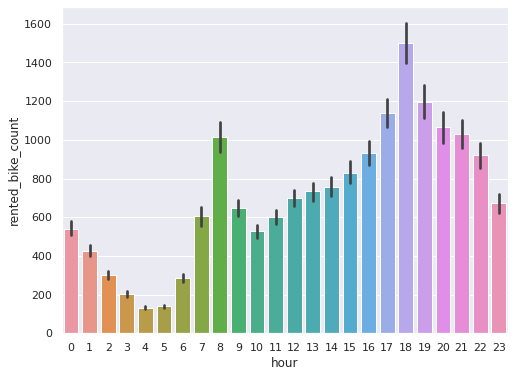

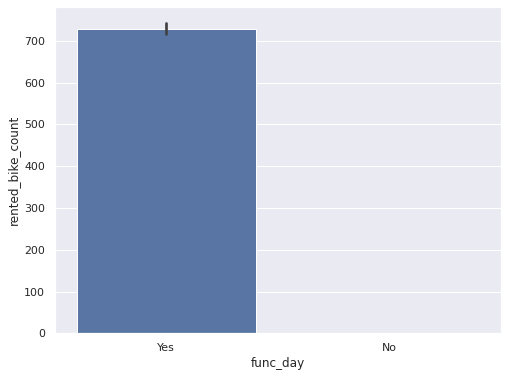

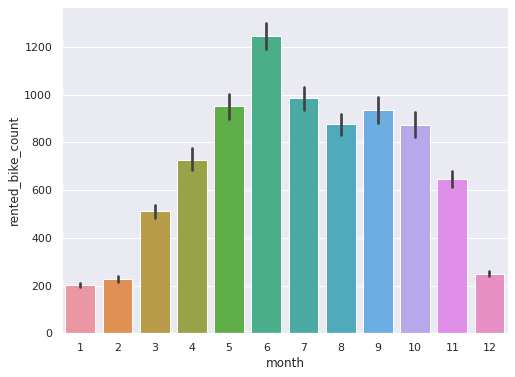

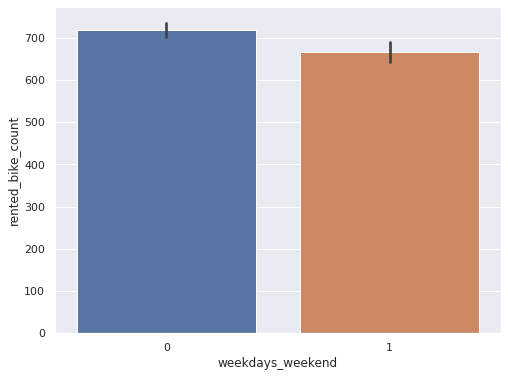

In [ ]:
# Chart - 11 visualization code
# Demand of bike with respect to different categorical variables
categorical=['seasons','holiday','hour','func_day','month','weekdays_weekend']
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.barplot(x=df[col],y=df['rented_bike_count'])

##### 1. Why did you pick the specific chart?

**Ans)** To know the demand of bikes with respect to different categorical variables.

##### 2. What is/are the insight(s) found from the chart?

**Ans)**
* Seasons - In summer season we have high demand rented bikes

* Holiday - In No holdiay we have high demand of rented bikes

* Hour - In morning time 7:00 AM to 9:00 AM we have high demand possible reason could be office time , In evening 4:00 PM to 10:00 PM we have high demand of rented bikes

* Func_day - In functioning day we have very high demand and in non-functioning day we approximately no demand of rented bikes

* Month - From june to october we have high demand of rented bikes

* weekdays_weekend - In weekdays we high demand of rented bikes

* **func_day can be a important feature to predict the rented bike count**

#### Chart - 12

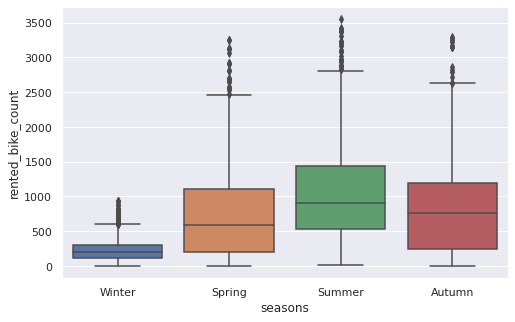

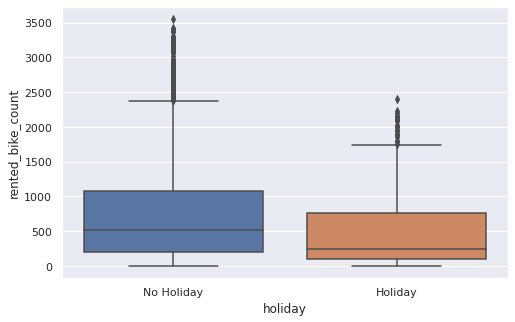

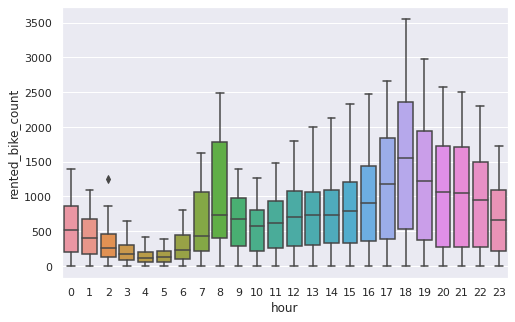

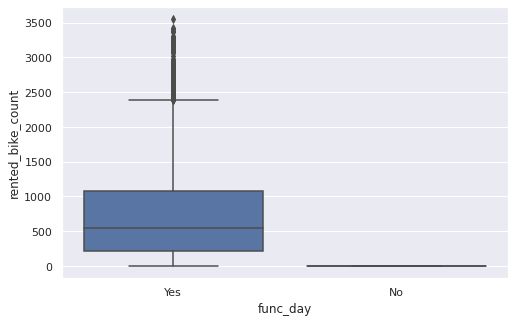

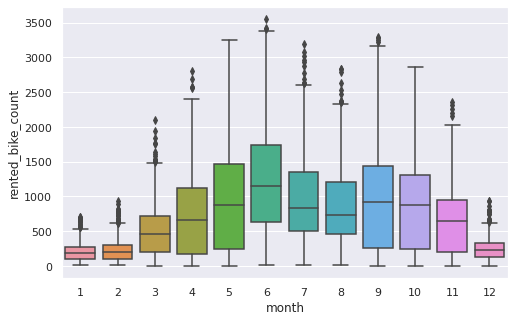

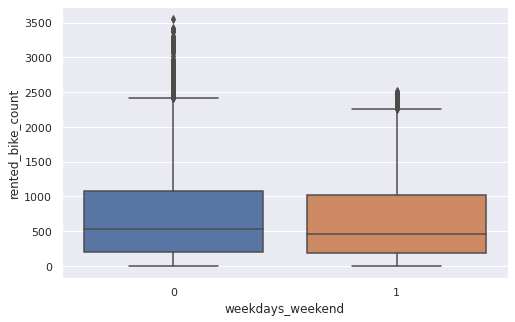

In [ ]:
# Chart - 12 visualization code
# Box plot for categorical variables
for elem in categorical:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=elem, y=dependent_var,data=df) 

##### 1. Why did you pick the specific chart?

**Ans)** To check outliers in categorical variables.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** There are outliers in the many categorical variables, which need to handled before going for model prediction.

#### Chart - 14 - Correlation Heatmap

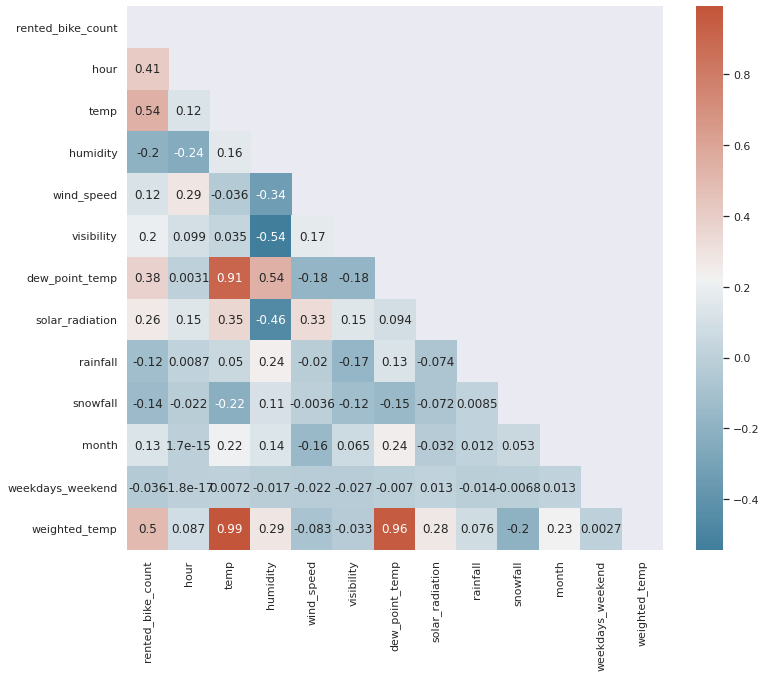

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

##### 1. Why did you pick the specific chart?

**Ans)** To find out the correlation between different variables in order to have a better understanding about the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Ans)** Dew_point_temp and temp are highly correlated.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.set(style="ticks", color_codes=True)

##### 1. Why did you pick the specific chart?

**Ans)**
*  To study the overall behaviour of all variables with each other , pair plot helps to visualize that relation easily

##### 2. What is/are the insight(s) found from the chart?

**Ans)** 
* Weighted temeprature (weighted_temp) and humidity are normaly distributed.
* wind_speed, snowfall, rainfall, solar_radiation are positively skewed.
* visibility is negetively skewed





## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
# Converting snowfall and rainfall to categorical attributes
df['snowfall'] = df['snowfall'].apply(lambda i: 1 if i>0 else 0)
df['rainfall'] = df['rainfall'].apply(lambda i: 1 if i>0 else 0)

KeyError: ignored

## **Dropping temp and dew point temp**

*   **As we have calculated weighted temperature using both temp and dew point temp**

In [ ]:
df=df.drop(['dew_point_temp'],axis=1)

### 1. Handling Missing Values

**Ans)** Since there are no missing values so this part is skipped

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

**Ans)** Since the outlier problem was solved using the transformation technique so this part is skipped

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
nominal_var=['seasons','holiday','hour','func_day','month']

# One hot encoding for categorical (nominal variables)
df=pd.get_dummies(df,columns=nominal_var)
df.columns

Index(['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall', 'weekdays_weekend',
       'weighted_temp', 'seasons_Autumn', 'seasons_Spring', 'seasons_Summer',
       'seasons_Winter', 'holiday_Holiday', 'holiday_No Holiday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'func_day_No',
       'func_day_Yes', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used dummification method for encoding ur categorical variable , it creates a vector for each categories of the feature, because in this way we dont want to give importance to any particular categories of a feature by ranking them as integer encoding does

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

*  Feature manipulation was done in the previous cells , we dont need more feature manipulation here in this case

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

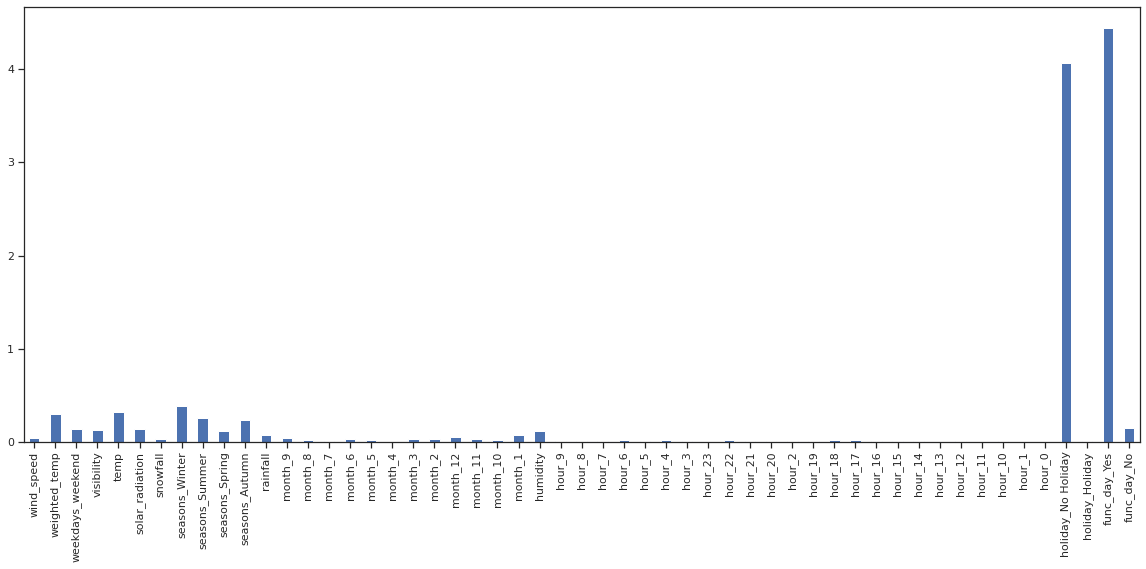

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import mutual_info_classif
mutual_info_gain=mutual_info_classif(df.drop('rented_bike_count',axis=1),df['rented_bike_count'])
mutual_info_gain=pd.Series(mutual_info_gain)
mutual_info_gain.index=df.drop('rented_bike_count',axis=1).columns
mutual_info_gain.sort_index(ascending=False).plot.bar(figsize=(20,8))

##### What all feature selection methods have you used  and why?

*  Mutual Information gain method is used, higher the values of mutual_info_gain higher is the importance.

##### Which all features you found important and why?

*  We found that holiday_no_holiday , func_day_yes,func_day_no,humidity,seasons, temp, solar_radiation, weighted_temp are most important features.
*  We found that hours, months and wind speed are not much useful.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**Ans)** Yes the data needs to be transformed as it is positively skewed. We have used square root transformation as it is most effective in our case to get normal distribution.

In [ ]:
# Transform Your data
independent_features=list(set(df.columns) -{'rented_bike_count'})
dependent_feature=['rented_bike_count']

In [ ]:
# Defining dependent and independent variables
X = df.drop('rented_bike_count',axis=1)

# applying squareroot transformation on rented_bike_count
y = np.sqrt(df['rented_bike_count'])

In [ ]:
pd.set_option('display.max_columns',None)
X.head(3)

,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,weekdays_weekend,weighted_temp,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,func_day_No,func_day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-5.2,37,2.2,2000,0.0,0,0,0,-8.92,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-5.5,38,0.8,2000,0.0,0,0,0,-9.13,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,-6.0,39,1.0,2000,0.0,0,0,0,-9.51,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X.shape

(8760, 53)

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

*  No its not needed here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


##### What data splitting ratio have you used and why? 

*  80-20 ratio has been used here

## ***6. ML Model Implementation***

## **ML Model - 1)**

In [ ]:
# defining rmse evaluation metric
def rmse(actual,pred):
  '''
  rmse(actual_y,predicted_y)
  '''
  mse = mean_squared_error(actual,pred)
  return np.sqrt(mse)

In [ ]:
def adjusted_r2(R2):
  n=X_train.shape[0]
  p=X_train.shape[1]
  Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
  return Adj_r2

In [ ]:
# ML Model - 1 Implementation
dt_model=DecisionTreeRegressor(random_state=0)
# Fit the Algorithm
dt_model.fit(X_train,y_train)
# Predict on the model
dt_model_pred=dt_model.predict(X_test)
dt_model_test_r2=r2_score(np.square(y_test),np.square(dt_model_pred))
print('Testing R2 score of Decsion Tree with Default parameters ',dt_model_test_r2)
print('Testing RMSE SCORE of Decsion Tree with Default parameters ',rmse(np.square(y_test),np.square(dt_model_pred)))
print('Testing Adjusted R2 SCORE of Decsion Tree with Default parameters ',adjusted_r2(dt_model_test_r2))
dt_model_pred=dt_model.predict(X_train)
dt_model_train_r2=r2_score(np.square(y_train),np.square(dt_model_pred))
print('Training R2 score of Decsion Tree with Default parameters ',dt_model_train_r2)
print('Training RMSE SCORE of Decsion Tree with Default parameters ',rmse(np.square(y_train),np.square(dt_model_pred)))
print('Training Adjusted R2 SCORE of Decsion Tree with Default parameters ',adjusted_r2(dt_model_train_r2))




Testing R2 score of Decsion Tree with Default parameters  0.8267765139067792
Testing RMSE SCORE of Decsion Tree with Default parameters  269.2544183125356
Testing Adjusted R2 SCORE of Decsion Tree with Default parameters  0.8254562888905381
Training R2 score of Decsion Tree with Default parameters  1.0
Training RMSE SCORE of Decsion Tree with Default parameters  2.940246761093476e-16
Training Adjusted R2 SCORE of Decsion Tree with Default parameters  1.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
# Using gridsearchcv to find the hyperparameters with best predictions
# A full grown tree has a max depth of 28.
DT = DecisionTreeRegressor(random_state=0)
DT_params = {
             'max_depth':np.arange(26,48,2),
             'min_samples_leaf':np.arange(4,12),
             'max_features':np.arange(4,26)
             }

# fitting model with hypertuned paramaters using grid search
DT_gridsearch = RandomizedSearchCV(DT,
                             DT_params,n_iter=50,
                             cv=3,
                             scoring= 'neg_root_mean_squared_error')
DT_gridsearch.fit(X_train,y_train)
DT_best_params = DT_gridsearch.best_params_

# model best parameters
DT_best_params


{'min_samples_leaf': 7, 'max_features': 22, 'max_depth': 30}

In [ ]:
DT_model = DecisionTreeRegressor(
                                 max_depth=DT_best_params['max_depth'],
                                 min_samples_leaf=DT_best_params['min_samples_leaf'],
                                 max_features=DT_best_params['max_features'],
                                 random_state=0)
DT_model.fit(X_train,y_train)
DT_train_pred = DT_model.predict(X_train)
DT_test_pred = DT_model.predict(X_test)

dt_model_test_r2=r2_score(np.square(y_test),np.square(DT_test_pred))
print('Testing R2 score of Decsion Tree Optimized ',dt_model_test_r2)
print('Testing RMSE SCORE of Decsion Tree Optimized ',rmse(np.square(y_test),np.square(DT_test_pred)))
print('Testing Adjusted R2 SCORE of Decsion Tree Optimized ',adjusted_r2(dt_model_test_r2))

dt_model_train_r2=r2_score(np.square(y_train),np.square(DT_train_pred))
print('Training R2 score of Decsion Tree Optimized ',dt_model_train_r2)
print('Training RMSE SCORE of Decsion Tree Optimized ',rmse(np.square(y_train),np.square(DT_train_pred)))
print('Training Adjusted R2 SCORE of Decsion Tree Optimized ',adjusted_r2(dt_model_train_r2))


Testing R2 score of Decsion Tree Optimized  0.8275551090973452
Testing RMSE SCORE of Decsion Tree Optimized  268.64862200708967
Testing Adjusted R2 SCORE of Decsion Tree Optimized  0.8262408181543137
Training R2 score of Decsion Tree Optimized  0.9117406880714782
Training RMSE SCORE of Decsion Tree Optimized  191.43945070179504
Training Adjusted R2 SCORE of Decsion Tree Optimized  0.9110680185960379


##### Which hyperparameter optimization technique have you used and why?

*  RandomizedSearchCV is used here as it randomly chooses among all possible combination of parameter grid and run on that randomly chosen set of parameters upto the certain iterations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Yes there has been improvement in the test data adjusted r2 of hypertunned model its increased by approximately 2%.

## **ML Model - 2)**

### **Random Forest**

In [ ]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
reg_preds_train =  reg.predict(X_train)
reg_preds_test  = reg.predict(X_test)
reg_train_r2= r2_score(np.square(y_train),np.square(reg_preds_train))

reg_test_r2=r2_score(np.square(y_test),np.square(reg_preds_test))
print('Testing R2 score of Random Forest with Default parameters ',reg_test_r2)
print('Testing RMSE SCORE of Random Forest with Default parameters ',rmse(np.square(y_test),np.square(reg_preds_test)))
print('Testing Adjusted R2 SCORE of Random Forest with Default parameters ',adjusted_r2(reg_test_r2))

reg_train_r2= r2_score(np.square(y_train),np.square(reg_preds_train))
print('Training R2 score of Random Forest with Default parameters ',reg_train_r2)
print('Training RMSE SCORE of Random Forest with Default parameters ',rmse(np.square(y_train),np.square(reg_preds_train)))
print('Training Adjusted R2 SCORE of Random Forest with Default parameters ',adjusted_r2(reg_train_r2))

Testing R2 score of Random Forest with Default parameters  0.911947810705848
Testing RMSE SCORE of Random Forest with Default parameters  191.96830515077608
Testing Adjusted R2 SCORE of Random Forest with Default parameters  0.9112767198182163
Training R2 score of Random Forest with Default parameters  0.9894613889436084
Training RMSE SCORE of Random Forest with Default parameters  66.15198174227113
Training Adjusted R2 SCORE of Random Forest with Default parameters  0.9893810687845648


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
opt = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    {
        'n_estimators': (5,1000),
        'max_features': ['auto','sqrt'],
        'max_depth': np.arange(2,70),
        'min_samples_split': np.arange(2,50),
        'min_samples_leaf': np.arange(1,50),
        'bootstrap': ["True","False"]
    },
    n_iter=35,
    cv=3,
    scoring='neg_root_mean_squared_error'
)
opt.fit(X_train,y_train)
# Fit the Algorithm
reg_model_opt = RandomForestRegressor(n_estimators=opt.best_params_['n_estimators'],
                                     min_samples_leaf=opt.best_params_['min_samples_leaf'],
                                     min_samples_split=opt.best_params_['min_samples_split'],
                                     max_depth=opt.best_params_['max_depth'],# pruning the max_depth here
                                     max_features=opt.best_params_['max_features'],
                                     bootstrap= opt.best_params_['bootstrap'],
                                     random_state=0)
reg_model_opt=reg_model_opt.fit(X_train,y_train)
reg_preds_train =  reg_model_opt.predict(X_train)
reg_preds_test  = reg_model_opt.predict(X_test)
# Predict on the model

reg_opt_test_r2=r2_score(np.square(y_test),np.square(reg_preds_test))
print('Testing R2 score of Random Forest Optimized ',reg_opt_test_r2)
print('Testing RMSE SCORE of Random Forest Optimized ',rmse(np.square(y_test),np.square(reg_preds_test)))
print('Testing Adjusted R2 SCORE of Random Forest Optimized ',adjusted_r2(reg_opt_test_r2))

reg_opt_train_r2= r2_score(np.square(y_train),np.square(reg_preds_train))
print('Training R2 score of Random Forest Optimized ',reg_opt_train_r2)
print('Training RMSE SCORE of Random Forest Optimized ',rmse(np.square(y_train),np.square(reg_preds_train)))
print('Training Adjusted R2 SCORE of Random Forest Optimized ',adjusted_r2(reg_opt_train_r2))

Testing R2 score of Random Forest Optimized  0.9081871969453169
Testing RMSE SCORE of Random Forest Optimized  196.0248249270892
Testing Adjusted R2 SCORE of Random Forest Optimized  0.9074874444917796
Training R2 score of Random Forest Optimized  0.9724458553427492
Training RMSE SCORE of Random Forest Optimized  106.96572469108996
Training Adjusted R2 SCORE of Random Forest Optimized  0.9722358510765953


##### Which hyperparameter optimization technique have you used and why?

*  we used RandomizedSearchCV for hyperparameter optimization as it randomly choose among all the possible cominations of parameter grid and also it doesnot run on all possible combination it run upto certain no of iteration which can be provided by the user

## **ML Model - 3)**

### **Gradient Boosting**

In [ ]:
# ML Model - 3 Implementation
gb_model = GradientBoostingRegressor(random_state=0)

# Fit the Algorithm
gb_model.fit(X_train,y_train)
gb_y_train_pred = gb_model.predict(X_train)
gb_y_test_pred = gb_model.predict(X_test)
gb_train_r2_score = r2_score(np.square(y_train),np.square(gb_y_train_pred))
gb_test_r2_score = r2_score(np.square(y_test),np.square(gb_y_test_pred))


print('Testing R2 score of Grdient Boosting with default params ',gb_test_r2_score)
print('Testing RMSE SCORE of Grdient Boosting with default params ',rmse(np.square(y_test),np.square(gb_y_test_pred)))
print('Testing Adjusted R2 SCORE of Grdient Boosting with default params ',adjusted_r2(gb_test_r2_score))

print('Training R2 score of Grdient Boosting with default params ',gb_train_r2_score)
print('Training RMSE SCORE of Grdient Boosting with default params ',rmse(np.square(y_train),np.square(gb_y_train_pred)))
print('Training Adjusted R2 SCORE of Grdient Boosting with default params ',adjusted_r2(gb_train_r2_score))

Testing R2 score of Grdient Boosting with default params  0.8346112284739757
Testing RMSE SCORE of Grdient Boosting with default params  263.0949196779706
Testing Adjusted R2 SCORE of Grdient Boosting with default params  0.8333507158350802
Training R2 score of Grdient Boosting with default params  0.8445627774507125
Training RMSE SCORE of Grdient Boosting with default params  254.05554867313217
Training Adjusted R2 SCORE of Grdient Boosting with default params  0.843378110669707


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grad_opt = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    {
       'n_estimators': (50,500),
        'max_features': ['auto','sqrt'],
        'max_depth': np.arange(2,70),
        'min_samples_split': np.arange(2,50),
        'min_samples_leaf': np.arange(1,50),
        
    },
    n_iter=32,
    cv=3,
    scoring='neg_root_mean_squared_error'
)
grad_opt.fit(X_train,y_train)
# Fit the Algorithm
gb_model = GradientBoostingRegressor(n_estimators=grad_opt.best_params_['n_estimators'],
                                     min_samples_leaf=grad_opt.best_params_['min_samples_leaf'],
                                     min_samples_split=grad_opt.best_params_['min_samples_split'],
                                     max_depth=grad_opt.best_params_['max_depth'],  
                                     max_features='auto',
                                     random_state=0)

gb_model.fit(X_train,y_train)
gb_opt_y_train_pred = gb_model.predict(X_train)
gb_opt_y_test_pred = gb_model.predict(X_test)
gb_opt_train_r2_score = r2_score(np.square(y_train),np.square(gb_opt_y_train_pred))
gb_opt_test_r2_score = r2_score(np.square(y_test),np.square(gb_opt_y_test_pred))


print('Testing R2 score of Grdient Boosting optimized ',gb_opt_test_r2_score)
print('Testing RMSE SCORE of Grdient Boosting optimized ',rmse(np.square(y_test),np.square(gb_opt_y_test_pred)))
print('Testing Adjusted R2 SCORE of Grdient Boosting optimized ',adjusted_r2(gb_opt_test_r2_score))

print('Training R2 score of Grdient Boosting optimized ',gb_train_r2_score)
print('Training RMSE SCORE of Grdient Boosting optimized ',rmse(np.square(y_train),np.square(gb_opt_y_train_pred)))
print('Training Adjusted R2 SCORE of Grdient Boosting optimized ',adjusted_r2(gb_opt_train_r2_score))
# Predict on the model

Testing R2 score of Grdient Boosting optimized  0.9289419872752165
Testing RMSE SCORE of Grdient Boosting optimized  172.45110442093136
Testing Adjusted R2 SCORE of Grdient Boosting optimized  0.9284004177218064
Training R2 score of Grdient Boosting optimized  0.8445627774507125
Training RMSE SCORE of Grdient Boosting optimized  38.255183190349804
Training Adjusted R2 SCORE of Grdient Boosting optimized  0.996448795670408


## **ML Model - 4)**

### **XGBoost**

> 



In [ ]:
# default model parameters
xgb_model = xgb.XGBRegressor(n_estimators=1000, random_state=0)

# fit
xgb_model.fit(X_train,y_train)
xgb_y_train_pred = xgb_model.predict(X_train)
xgb_y_test_pred = xgb_model.predict(X_test)

# train score
xgb_train_r2_score = r2_score(np.square(y_train),np.square(xgb_y_train_pred))
# test score
xgb_test_r2_score = r2_score(np.square(y_test),np.square(xgb_y_test_pred))
print('Testing R2 score of XGBoost with Deafault params ',xgb_test_r2_score)
print('Testing RMSE SCORE of XGBoost with Deafault params ',rmse(np.square(y_test),np.square(xgb_y_test_pred)))
print('Testing Adjusted R2 SCORE of XGBoost with Deafault params ',adjusted_r2(xgb_test_r2_score))

print('Training R2 score of XGBoost with Deafault params ',xgb_train_r2_score)
print('Training RMSE SCORE of XGBoost with Deafault params ',rmse(np.square(y_train),np.square(xgb_y_train_pred)))
print('Training Adjusted R2 SCORE of XGBoost with Deafault params ',adjusted_r2(xgb_train_r2_score))

[07:15:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing R2 score of XGBoost with Deafault params  0.9215792477689373
Testing RMSE SCORE of XGBoost with Deafault params  181.1652731962781
Testing Adjusted R2 SCORE of XGBoost with Deafault params  0.920981563002149
Training R2 score of XGBoost with Deafault params  0.9592026577094177
Training RMSE SCORE of XGBoost with Deafault params  130.15687322195785
Training Adjusted R2 SCORE of XGBoost with Deafault params  0.9588917202430097


#### **Hypertunning XGBOOST model**

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')



# HYperparameter Grid
xgb_params = {
        'n_estimators': (500,600),
        'max_depth': np.arange(2,70),
        'min_samples_split': np.arange(2,50),
        'min_samples_leaf': np.arange(2,50)
        
    }


xgb_gridsearch = RandomizedSearchCV(xgb_model,xgb_params,n_iter=35,cv=3,scoring='neg_root_mean_squared_error')
xgb_gridsearch.fit(X_train,y_train)
xgb_best_params = xgb_gridsearch.best_params_
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                                     min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                     min_samples_split=xgb_best_params['min_samples_split'],
                                     max_depth=xgb_best_params['max_depth'],    
                                     max_features='auto',
                                     random_state=0)

# fit
xgb_model.fit(X_train,y_train)
xgb_y_train_pred = xgb_model.predict(X_train)
xgb_y_test_pred = xgb_model.predict(X_test)

xgb_opt_train_r2_score = r2_score(np.square(y_train),np.square(xgb_y_train_pred))
xgb_opt_test_r2_score = r2_score(np.square(y_test),np.square(xgb_y_test_pred))
print('Testing R2 score of XGBoost Optimized ',xgb_opt_test_r2_score)
print('Testing RMSE SCORE of XGBoost Optimized ',rmse(np.square(y_test),np.square(xgb_y_test_pred)))
print('Testing Adjusted R2 SCORE of XGBoost Optimized  ',adjusted_r2(xgb_opt_test_r2_score))

print('Training R2 score of XGBoost Optimized  ',xgb_opt_train_r2_score)
print('Training RMSE SCORE of XGBoost Optimized  ',rmse(np.square(y_train),np.square(xgb_y_train_pred)))
print('Training Adjusted R2 SCORE of XGBoost Optimized  ',adjusted_r2(xgb_opt_train_r2_score))

[08:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing R2 score of XGBoost Optimized  0.9270262362586734
Testing RMSE SCORE of XGBoost Optimized  174.76031726417943
Testing Adjusted R2 SCORE of XGBoost Optimized   0.9264700657843723
Training R2 score of XGBoost Optimized   0.999559841397744
Training RMSE SCORE of XGBoost Optimized   13.519348636766326
Training Adjusted R2 SCORE of XGBoost Optimized   0.9995564867233236


### **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Building a adaboost model with best parameters
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=23), n_estimators=10, learning_rate=1.0, loss='linear', random_state=0)

# fit
adaboost_model.fit(X_train,y_train)
adaboost_y_train_pred = adaboost_model.predict(X_train)
adaboost_y_test_pred = adaboost_model.predict(X_test)

adaboost_train_r2_score = r2_score(np.square(y_train),np.square(adaboost_y_train_pred))
adaboost_test_r2_score = r2_score(np.square(y_test),np.square(adaboost_y_test_pred))
print('Testing R2 score of Adaboost with default params ',adaboost_test_r2_score)
print('Testing RMSE SCORE of Adaboost with default params ',rmse(np.square(y_test),np.square(adaboost_y_test_pred)))
print('Testing Adjusted R2 SCORE of Adaboost with default params  ',adjusted_r2(adaboost_test_r2_score))

print('Training R2 score of Adaboost with default params  ',adaboost_train_r2_score)
print('Training RMSE SCORE of Adaboost with default params  ',rmse(np.square(y_train),np.square(adaboost_y_train_pred)))
print('Training Adjusted R2 SCORE of Adaboost with default params ',adjusted_r2(adaboost_train_r2_score))

Testing R2 score of Adaboost with default params  0.9131833185984044
Testing RMSE SCORE of Adaboost with default params  190.6167417128226
Testing Adjusted R2 SCORE of Adaboost with default params   0.9125216441499885
Training R2 score of Adaboost with default params   0.9970894831523082
Training RMSE SCORE of Adaboost with default params   34.76451937630809
Training Adjusted R2 SCORE of Adaboost with default params  0.9970673006109035


#### **Hypertunning AdaBoost**

In [ ]:
ada_opt = RandomizedSearchCV(
    AdaBoostRegressor(random_state=42),
    {
        'n_estimators': (5,500),
        'base_estimator': [DecisionTreeRegressor(max_depth=i) for i in np.arange(2,50)],
        'learning_rate': np.arange(0.1, 2.1, 0.1),
        'loss':['linear','square']
        
        
    },
    n_iter=32,
    cv=3,
    scoring='neg_root_mean_squared_error'
)
ada_opt.fit(X_train,y_train)
# best parameters
best_params=ada_opt.best_params_
adaboost_model = AdaBoostRegressor(base_estimator=best_params['base_estimator'], n_estimators=best_params['n_estimators'],
                                   learning_rate=best_params['learning_rate'], loss=best_params['loss'], random_state=0)

# fit
adaboost_model.fit(X_train,y_train)
adaboost_y_train_pred = adaboost_model.predict(X_train)
adaboost_y_test_pred = adaboost_model.predict(X_test)
# train score
adaboost_opt_train_r2_score = r2_score(np.square(y_train),np.square(adaboost_y_train_pred))
#test score
adaboost_opt_test_r2_score = r2_score(np.square(y_test),np.square(adaboost_y_test_pred))
print('Testing R2 score of Adaboost Optimized ',adaboost_opt_test_r2_score)
print('Testing RMSE SCORE of Adaboost Optimized ',rmse(np.square(y_test),np.square(adaboost_y_test_pred)))
print('Testing Adjusted R2 SCORE of Adaboost Optimized  ',adjusted_r2(adaboost_opt_test_r2_score))

print('Training R2 score of Adaboost Optimized  ',adaboost_opt_train_r2_score)
print('Training RMSE SCORE of Adaboost Optimized  ',rmse(np.square(y_train),np.square(adaboost_y_train_pred)))
print('Training Adjusted R2 SCORE of Adaboost Optimized ',adjusted_r2(adaboost_opt_train_r2_score))

Testing R2 score of Adaboost Optimized  0.9288876222397185
Testing RMSE SCORE of Adaboost Optimized  172.51706121823713
Testing Adjusted R2 SCORE of Adaboost Optimized   0.9283456383424946
Training R2 score of Adaboost Optimized   0.9967912120551882
Training RMSE SCORE of Adaboost Optimized   36.50242182108045
Training Adjusted R2 SCORE of Adaboost Optimized  0.9967667562367994


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 XGBoost model after the hypertuning is working best among all models

XGBoost after Hypertuning has Adjusted R square 0.92647 on test data and 0.9997 on training data .It aslo has lowest RSME value among all the models i.e 174.7593 on test data and 9.5632 on Training data .We selected the best model based on the Adjusted R square values of all the models on the test data and lastly also saw its RMSE score. We selected the model which have highest Adjusted R square and lowest RMSE values. Therefore we end up getting XGBoost as our best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

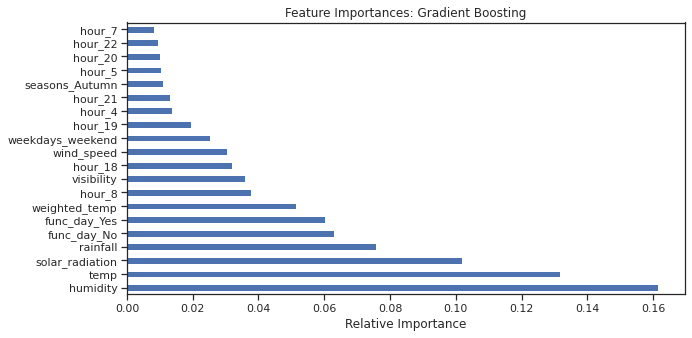

In [ ]:
dt_feat_imp = pd.Series(adaboost_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: Gradient Boosting')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Following are the conclusions that can be drawn from this project**

*  Temp and dew point temp are highly multicorrelated so we decided to merge these features into one feature by taking weighted percentage from each of these two features.

*   Rented Bike count is likely to be more dependent on temperature and holidays.

*   Rented Bike counts have outliers and also possitvely skewed , which is soved after applying square root transformation  on the rented bike counts

*   Rainfall,snowfall and visbility were highly skewed and have most of the values as 0, so we decided to categorize these variables.

**Model Interpretaion**

*   XGBoost model after the hypertuning is working best among all models

*   XGBoost after hypertuning has adjusted R square 0.92647 on test data and 0.9997 on training data. It aslo has lowest RSME value among all the models i.e 174.7593 on test data and 9.5632 on Training data.

*  From the feature importance we got to know that temp, humidity and functional day, solar radiation and rainfall are major important features. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***